## Plot Errors

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

#### Path to Folder and file (Modify these accordingly)

In [31]:
data_folder = Path("C:/Users/shash/Project/ANN_Project/Euler_Test/ErrorLogs")
file_to_open = data_folder / "CycleGAN_log_run2.txt"

#### Reading file and Data Processing (using regex)

In [42]:
df = pd.read_csv(file_to_open, header = None, sep=",")
df[0]=df[0].str.extract('(\d+)')[0].apply(int)
df[1]=df[1].str.extract('[+-]?(\d+(\.\d*)?)')[0].apply(float)
df[2]=df[2].str.extract('[+-]?(\d+(\.\d*)?)')[0].apply(float)
df[3]=df[3].str.extract('[+-]?(\d+(\.\d*)?)')[0].apply(float)
df[4]=df[4].str.extract('[+-]?(\d+(\.\d*)?)')[0].apply(float)
df[5]=df[5].str.extract('[+-]?(\d+(\.\d*)?)')[0].apply(float)
df = df.rename(index=str, columns={0: "Step", 1: "d_real_loss", 2: "d_mnist_loss", 3: "d_svhn_loss", 4:"d_fake_loss", 5:"g_loss"})
df

,Step,d_real_loss,d_mnist_loss,d_svhn_loss,d_fake_loss,g_loss
0,10,0.2485,0.1324,0.1161,0.1903,1.2494
1,20,0.1298,0.0394,0.0905,0.3437,2.0135
2,30,0.3141,0.2311,0.0830,0.0989,1.4147
3,40,0.0969,0.0311,0.0658,0.1432,1.9703
4,50,0.0981,0.0646,0.0334,0.0755,1.2669
5,60,0.1264,0.0321,0.0943,0.1150,1.9845
6,70,0.1101,0.0623,0.0478,0.1491,1.9091
7,80,0.2408,0.0528,0.1880,0.1341,1.5439
8,90,0.2659,0.0331,0.2327,0.2390,1.2579
9,100,0.2028,0.0270,0.1759,0.3002,1.4586


#### Plotting the data

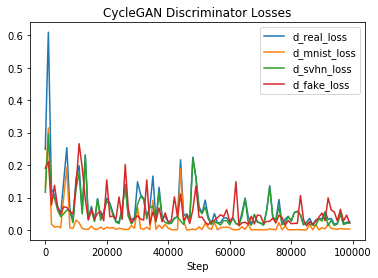

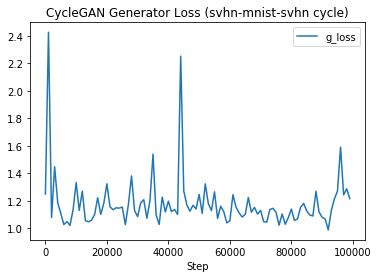

In [45]:
# We have 10000 data points, taking every 100th element starting from 0
subsampled_data= df.iloc[::100, :]
discriminator_plot = subsampled_data.plot(x='Step', y=['d_real_loss', 'd_mnist_loss', 'd_svhn_loss', 'd_fake_loss'], kind='line', title='CycleGAN Discriminator Losses')
fig = discriminator_plot.get_figure()
fig.savefig(data_folder / "Plots/CycleGANRun2_DiscriminatorLosses.png")

generator_plot = subsampled_data.plot(x='Step', y='g_loss', kind='line', title='CycleGAN Generator Loss (svhn-mnist-svhn cycle)')
fig = generator_plot.get_figure()
fig.savefig(data_folder / "Plots/CycleGANRun2_GeneratorLosses.png")

In [47]:
file_to_open_SGAN = data_folder / "SGAN_log.txt"

In [50]:
df = pd.read_csv(file_to_open_SGAN, header = None, sep=",")
df[0]=df[0].str.extract('(\d+)')[0].apply(int)
df[1]=df[1].str.extract('[+-]?(\d+(\.\d*)?)')[0].apply(float)
df[2]=df[2].str.extract('[+-]?(\d+(\.\d*)?)')[0].apply(float)
df[3]=df[3].str.extract('[+-]?(\d+(\.\d*)?)')[0].apply(float)
df[4]=df[4].str.extract('[+-]?(\d+(\.\d*)?)')[0].apply(float)
df[5]=df[5].str.extract('[+-]?(\d+(\.\d*)?)')[0].apply(float)
df = df.rename(index=str, columns={0: "Step", 1: "d_real_loss", 2: "d_mnist_loss", 3: "d_svhn_loss", 4:"d_fake_loss", 5:"g_loss"})

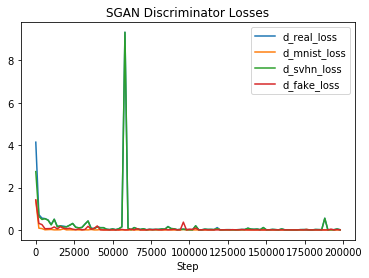

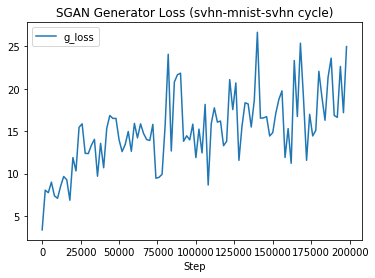

In [56]:
# We have 10000 data points, taking every 200th element starting from 0
subsampled_data= df.iloc[::200, :]
discriminator_plot = subsampled_data.plot(x='Step', y=['d_real_loss', 'd_mnist_loss', 'd_svhn_loss', 'd_fake_loss'], kind='line', title='SGAN Discriminator Losses')
fig = discriminator_plot.get_figure()
fig.savefig(data_folder / "Plots/SGANRun1_DiscriminatorLosses.png")

generator_plot = subsampled_data.plot(x='Step', y='g_loss', kind='line', title='SGAN Generator Loss (svhn-mnist-svhn cycle)')
fig = generator_plot.get_figure()
fig.savefig(data_folder / "Plots/SGANRun1_GeneratorLosses.png")